In [ ]:
Boston housing Data Set
Source: https://www.kaggle.com/c/boston-housing
crim - per capita crime rate by town.

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox - nitrogen oxides concentration (parts per 10 million).

rm - average number of rooms per dwelling.

age - proportion of owner-occupied units built prior to 1940.

dis - weighted mean of distances to five Boston employment centres.

rad - index of accessibility to radial highways.

tax - full-value property-tax rate per $10,000.

ptratio - pupil-teacher ratio by town.

lstat - lower status of the population (percent).

medv - median value of owner-occupied homes in $1000s.

In [ ]:
#In this problem I will use use various different ML regression techniques to build and train the model that can predict house median value of the home accurately

In [1]:
import sklearn

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
#Importing the file as CSV

In [3]:
data = pd.read_csv('/Users/nehaalpatel/Documents/Machine_Learning/I-creating-machine-learning-models/datasets/boston_data.csv', index_col=0)

data.head()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [ ]:
#Checking for null values 

In [122]:
data[data.isnull().any(axis=1)].count()

indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [ ]:
#Describing the data in terms of Univariate Measures 

In [123]:
data.describe()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


In [ ]:
#Describing the data in terms of Bivariate Measures specifically correlation 

In [124]:
corr = data.corr()

corr

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
indus,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,0.614155,-0.473932
chas,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,-0.050055,0.204390
nox,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,0.598874,-0.413054
rm,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,-0.615747,0.689598
age,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,0.588834,-0.358888
dis,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,-0.505939,0.249422
rad,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,0.484568,-0.352251
tax,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,0.544485,-0.448078
ptratio,0.391087,-0.125067,0.192513,-0.366927,0.259293,-0.231101,0.470849,0.467437,1.000000,0.374802,-0.481376
lstat,0.614155,-0.050055,0.598874,-0.615747,0.588834,-0.505939,0.484568,0.544485,0.374802,1.000000,-0.738600


In [ ]:
#Ploting for linear regression age vs median value

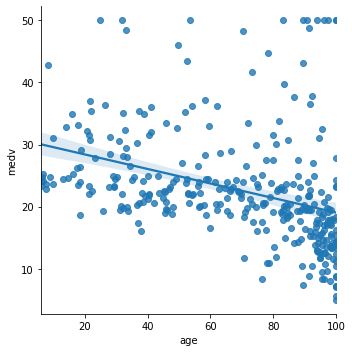

In [125]:
sns.lmplot("age", "medv", data)

In [ ]:
# Creating a heat map to find the correlation between median values and the rest of values 

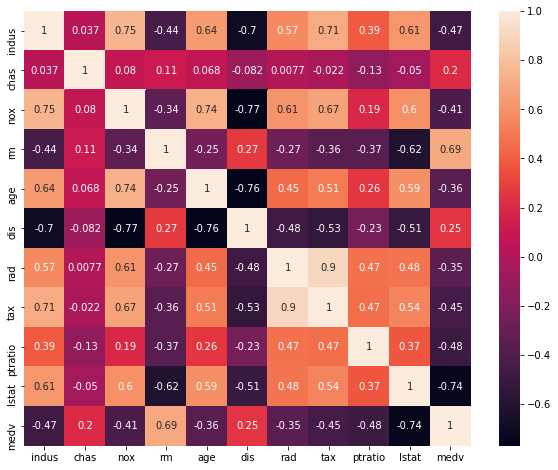

In [126]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
#Creating a function for Linear Regression Model fit on the data

In [127]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    print("Linear Regression")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

In [ ]:
#Creating a function for Lasso Regression Model fit on the data

In [128]:
from sklearn.linear_model import Lasso

def lasso_model(x_train, y_train):
    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression


In [ ]:
#Creating a function for Ridge Regression Model fit on the data

In [129]:
from sklearn.linear_model import Ridge

def ridge_model(x_train, y_train):
    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

In [ ]:
#Creating a function for Sochastic Gradient Descent Regression Model fit on the data

In [130]:
from sklearn.linear_model import SGDRegressor

def sgd_model(x_train, y_train):
    print("SGD Regression")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

In [ ]:
# Creating a function for MLP Regressor Neural Network to fit the data. 3 Hidden layers, with 12 neurons each.

In [131]:
from sklearn.neural_network import MLPRegressor

def mlp_model(x_train, y_train):
    print("MLP Regression")
    mlp_reg = MLPRegressor(activation='relu', hidden_layer_sizes={12, 12, 12}, solver='lbfgs', verbose = True, max_iter= 20000)
    mlp_reg.fit(x_train, y_train)
    return mlp_reg


In [ ]:
#Creating a Function for building, training and evaluating the model by using the train test split method where X is all variables but the median value and Y is target name = median value of house. The function preprocesses the data using standard scaler, trains the model ans print out the r2 score for accuracy, with the predicted values vs actual values, and a visual represtation of accuracy.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)
    
    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("medv of home")
    plt.legend()
    plt.show()


    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10)
           }


In [ ]:
# Utilizing the build and train model function to predict and score the linear regression model on the data. 3 inputs as needed: data file, value to predict(Median Value of home ), and the type of model (In this case Linear model using the linear_model function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy. 

Linear Regression
Training Score :  0.7165238743004549
Testing Score :  0.6940069129106331
     y_test     y_pred
ID                    
329    19.3  22.399973
179    29.9  31.418398
121    22.0  21.863800
115    18.5  25.260247
190    34.9  33.182911
110    19.4  19.382740
298    20.3  20.282763
461    16.4  19.288532
88     22.2  26.596083
335    20.7  22.759374


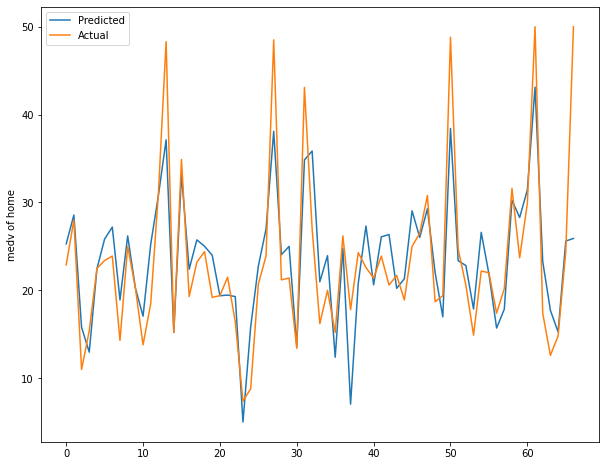

In [133]:
linear_reg = build_and_train_model(data, "medv", linear_model)

In [ ]:
# Utilizing the build and train model function to predict and score the lasso model on the data. 3 inputs as needed: data file, value to predict(Median Value of home ), and the type of model (In this case lasso model using the lasso function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy. 

Lasso Regression
Training Score :  0.6566757632539815
Testing Score :  0.6360274527710379
     y_test     y_pred
ID                    
339    20.6  23.557478
13     21.7  21.179899
121    22.0  20.072419
110    19.4  19.656344
161    27.0  30.791063
344    23.9  27.530921
88     22.2  24.588179
459    14.9  19.812227
94     25.0  26.307587
372    50.0  23.451123


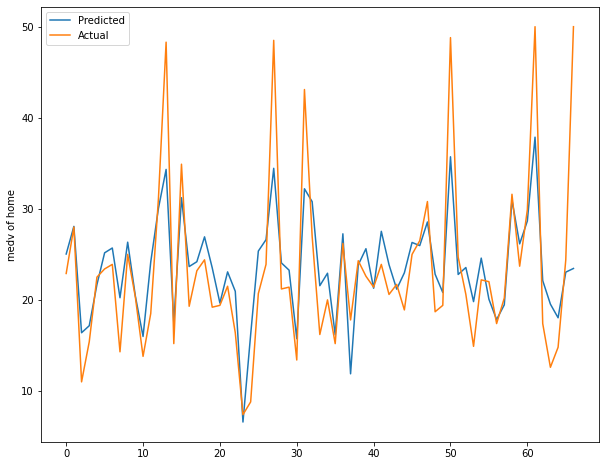

In [134]:
lasso_reg = build_and_train_model(data, "medv", lasso_model)

In [ ]:
# Utilizing the build and train model function to predict and score the ridge model on the data. 3 inputs as needed: data file, value to predict(Median Value of home ), and the type of model (In this case ridge model using the ridge function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy. 

Ridge Regression
Training Score :  0.7164933451948359
Testing Score :  0.6945525892511741
     y_test     y_pred
ID                    
97     21.4  25.010333
39     24.7  23.376502
250    26.2  24.818827
465    21.4  20.605599
28     14.8  15.332347
13     21.7  20.259738
81     28.0  28.564101
179    29.9  31.391131
247    24.3  20.830994
161    27.0  35.787715


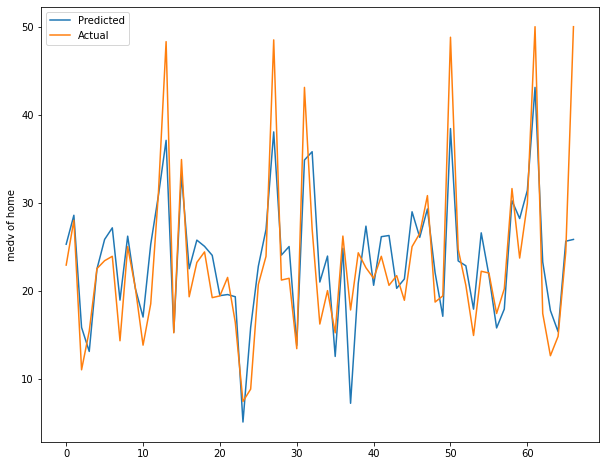

In [135]:
ridge_reg = build_and_train_model(data, "medv", ridge_model)

In [ ]:
# Utilizing the build and train model function to predict and score the Stochastic gradient descent model on the data. 3 inputs as needed: data file, value to predict(Median Value of home ), and the type of model (In this case ridge model using the SGD function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy. 

SGD Regression
Training Score :  0.7151114493869009
Testing Score :  0.6960981579563339
     y_test     y_pred
ID                    
448    12.6  17.769809
250    26.2  24.854928
82     23.9  26.837520
87     22.5  22.426676
298    20.3  19.686428
91     22.6  27.497350
97     21.4  25.114077
149    17.8   7.714310
475    13.8  16.588547
137    17.4  16.043968


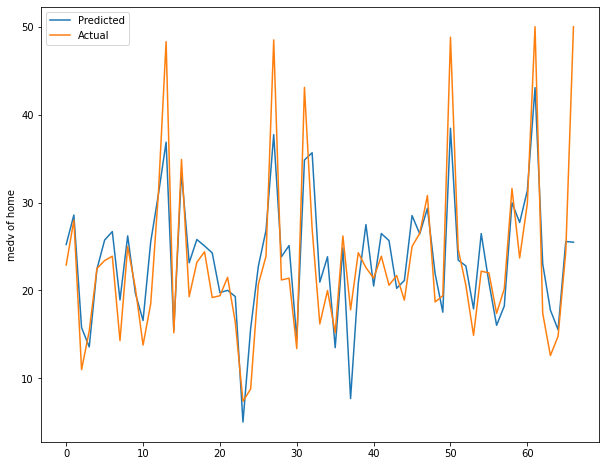

In [136]:
sgd_reg = build_and_train_model(data, "medv", sgd_model)

In [ ]:
# Utilizing the build and train model function to predict and score the Neural Network Multilayer Preceptron regression model on the data. 3 inputs as needed: data file, value to predict(Median Value of home ), and the type of model (In this case MLP regressor model using the MLP Reg function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy. 

MLP Regression
Training Score :  0.9625114125245534
Testing Score :  0.910707101466648
     y_test     y_pred
176    19.7  19.111451
280    18.9  17.453134
303    31.2  29.641408
103    21.4  24.374474
171    27.5  30.265498
168    41.7  47.163161
108     7.4   9.805683
6      17.4  17.392869
97     20.5  18.881176
136    22.2  24.539497


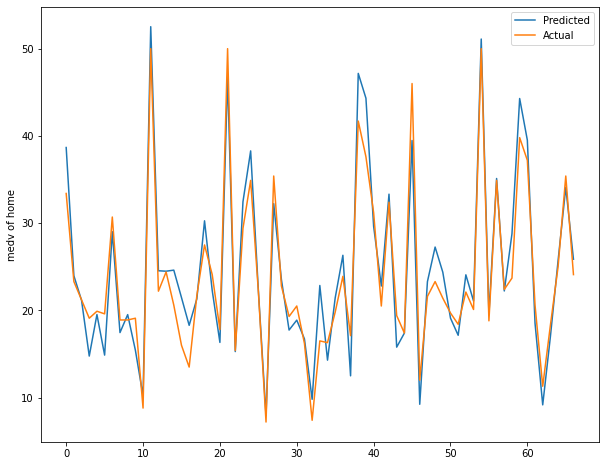

In [137]:
data = data.sample(frac=1).reset_index(drop=True)

mlp_reg = build_and_train_model(data, "medv", mlp_model)